<a href="https://colab.research.google.com/github/208B1A0428/RESUME-PROJECTS/blob/master/Cat_vs_Dog_image_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing DOGS VS CATS Dataset from kaggle**

In [ ]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

'dog image.jpeg'    kaggle.json		   test1.zip
 dogs-vs-cats.zip   sample_data		   train
'image resized'     sampleSubmission.csv   train.zip


In [ ]:
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
from zipfile import ZipFile

dataset='/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
import os
#counting the no.of files in the train folder
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print("Number of Images",file_count)

Number of Images 25000


**print** **name** **of** **images**

In [ ]:
file_names=os.listdir('/content/train')
print(file_names)

['cat.2705.jpg', 'cat.10411.jpg', 'dog.4800.jpg', 'cat.5735.jpg', 'cat.1530.jpg', 'dog.12377.jpg', 'dog.11740.jpg', 'cat.6150.jpg', 'cat.560.jpg', 'dog.1315.jpg', 'dog.2372.jpg', 'dog.8970.jpg', 'dog.7342.jpg', 'cat.10073.jpg', 'cat.5992.jpg', 'cat.8928.jpg', 'dog.11071.jpg', 'cat.4213.jpg', 'dog.4338.jpg', 'dog.7933.jpg', 'cat.11783.jpg', 'cat.5740.jpg', 'cat.11911.jpg', 'dog.2030.jpg', 'dog.247.jpg', 'dog.7425.jpg', 'dog.2922.jpg', 'cat.11621.jpg', 'cat.2086.jpg', 'dog.10471.jpg', 'cat.12423.jpg', 'cat.10864.jpg', 'dog.521.jpg', 'dog.7158.jpg', 'cat.12151.jpg', 'dog.5765.jpg', 'cat.1641.jpg', 'dog.1000.jpg', 'dog.7652.jpg', 'cat.6107.jpg', 'dog.10254.jpg', 'cat.6895.jpg', 'dog.6769.jpg', 'dog.4710.jpg', 'cat.424.jpg', 'cat.5868.jpg', 'dog.5298.jpg', 'cat.10200.jpg', 'cat.11415.jpg', 'cat.8801.jpg', 'dog.9917.jpg', 'cat.11060.jpg', 'dog.3680.jpg', 'dog.8077.jpg', 'dog.11603.jpg', 'cat.1971.jpg', 'dog.10639.jpg', 'dog.11665.jpg', 'dog.692.jpg', 'dog.6597.jpg', 'cat.5925.jpg', 'dog.1044

**Importing the libraries**

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

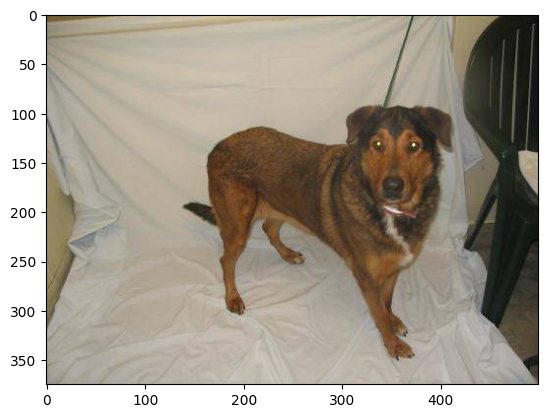

In [ ]:
img=mpimg.imread("/content/train/dog.1315.jpg")
imgplt=plt.imshow(img)
plt.show()

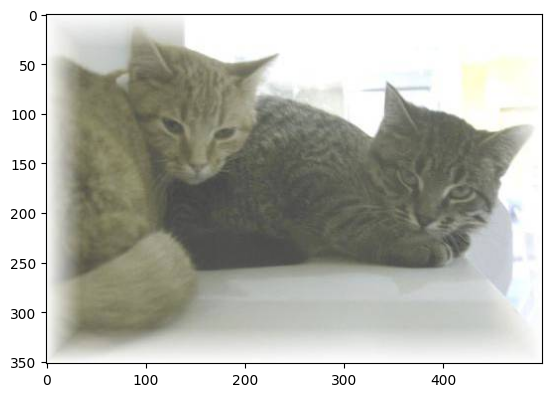

In [ ]:
img=mpimg.imread("/content/train/cat.6150.jpg")
imgplt=plt.imshow(img)
plt.show()

In [ ]:
file_names=os.listdir('/content/train')

for i in range(5):
  names=file_names[i]
  print(names[0:3])

cat
cat
dog
cat
cat


In [ ]:
dog_count,cat_count=0,0
for file_img in file_names:
    name=file_img[0:3]
    if(name=='dog'):
      dog_count+=1
    else:
      cat_count+=1
print("No.of dog images:",dog_count)
print("No.of cat images:",cat_count)

No.of dog images: 12500
No.of cat images: 12500


**Resizing the all images**

In [ ]:
import os

directory_path = '/content/image resized'
os.makedirs(directory_path, exist_ok=True)


In [ ]:
original_folder='/content/train/'
filename=os.listdir(original_folder)
print(filename)

['cat.2705.jpg', 'cat.10411.jpg', 'dog.4800.jpg', 'cat.5735.jpg', 'cat.1530.jpg', 'dog.12377.jpg', 'dog.11740.jpg', 'cat.6150.jpg', 'cat.560.jpg', 'dog.1315.jpg', 'dog.2372.jpg', 'dog.8970.jpg', 'dog.7342.jpg', 'cat.10073.jpg', 'cat.5992.jpg', 'cat.8928.jpg', 'dog.11071.jpg', 'cat.4213.jpg', 'dog.4338.jpg', 'dog.7933.jpg', 'cat.11783.jpg', 'cat.5740.jpg', 'cat.11911.jpg', 'dog.2030.jpg', 'dog.247.jpg', 'dog.7425.jpg', 'dog.2922.jpg', 'cat.11621.jpg', 'cat.2086.jpg', 'dog.10471.jpg', 'cat.12423.jpg', 'cat.10864.jpg', 'dog.521.jpg', 'dog.7158.jpg', 'cat.12151.jpg', 'dog.5765.jpg', 'cat.1641.jpg', 'dog.1000.jpg', 'dog.7652.jpg', 'cat.6107.jpg', 'dog.10254.jpg', 'cat.6895.jpg', 'dog.6769.jpg', 'dog.4710.jpg', 'cat.424.jpg', 'cat.5868.jpg', 'dog.5298.jpg', 'cat.10200.jpg', 'cat.11415.jpg', 'cat.8801.jpg', 'dog.9917.jpg', 'cat.11060.jpg', 'dog.3680.jpg', 'dog.8077.jpg', 'dog.11603.jpg', 'cat.1971.jpg', 'dog.10639.jpg', 'dog.11665.jpg', 'dog.692.jpg', 'dog.6597.jpg', 'cat.5925.jpg', 'dog.1044

In [ ]:
original_folder='/content/train/'
resized_folder='/content/image resized/'

for i in range (2000):

  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert("RGB")

  newImgPath=resized_folder+filename
  img.save(newImgPath)

**Display resized dog image and cat image**

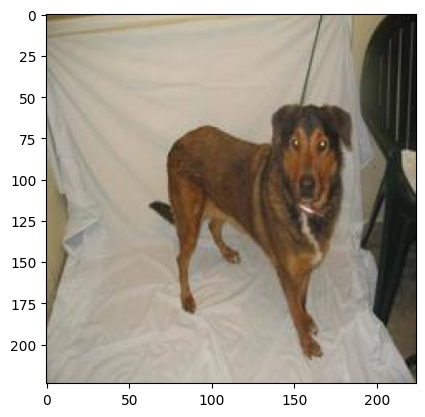

In [ ]:
# display resized dog image
img=mpimg.imread('/content/image resized/dog.1315.jpg')
imgplt=plt.imshow(img)
plt.show()

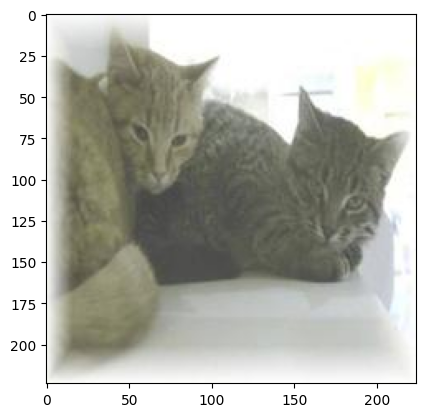

In [ ]:
# Display resized cat Image
img=mpimg.imread('/content/image resized/cat.6150.jpg')
imgplt=plt.imshow(img)
plt.show()

In [ ]:
filenames= os.listdir('/content/image resized')

labels=[]
for i in range(2000):
  file_name=filenames[i]
  label=file_name[0:3]
  if(label=='dog'):
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.2705.jpg', 'cat.10411.jpg', 'dog.4800.jpg', 'cat.5735.jpg', 'cat.1530.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 0, 0]
2000


In [ ]:
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1007  993]


**Converting all the resized images to numpy arrays**

In [ ]:
import cv2
import glob


In [ ]:
image_directory='/content/image resized/'
image_extension=['png','jpg']

files=[]
[files.extend(glob.glob(image_directory + '*.'+e)) for e in image_extension]

dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 86 137 180]
   [ 93 143 189]
   [102 150 198]
   ...
   [ 92 138 192]
   [106 150 203]
   [121 165 218]]

  [[ 88 139 182]
   [ 93 143 189]
   [101 149 197]
   ...
   [ 88 134 188]
   [103 147 200]
   [120 164 217]]

  [[ 90 141 184]
   [ 94 144 190]
   [101 149 197]
   ...
   [ 83 129 183]
   [ 98 145 197]
   [116 163 215]]

  ...

  [[120 215 254]
   [118 213 253]
   [119 211 254]
   ...
   [126 163 191]
   [128 162 191]
   [126 163 191]]

  [[119 214 254]
   [118 213 253]
   [118 210 253]
   ...
   [132 167 193]
   [134 167 193]
   [131 166 192]]

  [[119 214 254]
   [118 213 253]
   [118 210 253]
   ...
   [135 168 194]
   [135 168 194]
   [135 168 194]]]


 [[[ 15  16   6]
   [ 13  14   4]
   [ 11  12   2]
   ...
   [236 248 252]
   [233 248 251]
   [232 247 250]]

  [[ 14  15   5]
   [ 12  13   3]
   [ 11  12   2]
   ...
   [236 248 252]
   [233 248 251]
   [232 247 250]]

  [[ 18  19  10]
   [ 17  18   9]
   [ 16  17   8]
   ...
   [236 248 252]
   [233 248 251]
   [232 247

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
x=dog_cat_images
y=np.asarray(labels)

**Train Test Split**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
#scaling process
x_train=x_train/255
x_test=x_test/255

In [ ]:
print(x_train)

[[[[0.10980392 0.12941176 0.07058824]
   [0.10980392 0.12941176 0.07058824]
   [0.10980392 0.12941176 0.07058824]
   ...
   [0.7372549  0.71764706 0.71372549]
   [0.74901961 0.72941176 0.71764706]
   [0.74901961 0.72941176 0.71764706]]

  [[0.10980392 0.12941176 0.07058824]
   [0.10980392 0.12941176 0.07058824]
   [0.10980392 0.12941176 0.07058824]
   ...
   [0.7372549  0.71764706 0.71372549]
   [0.74509804 0.7254902  0.71372549]
   [0.74901961 0.72941176 0.71764706]]

  [[0.10980392 0.12941176 0.07058824]
   [0.10980392 0.12941176 0.07058824]
   [0.10980392 0.12941176 0.07058824]
   ...
   [0.74117647 0.72156863 0.71764706]
   [0.74509804 0.7254902  0.71372549]
   [0.74901961 0.72941176 0.71764706]]

  ...

  [[0.34509804 0.37647059 0.37647059]
   [0.34901961 0.38039216 0.38039216]
   [0.34901961 0.38039216 0.38039216]
   ...
   [0.70980392 0.76078431 0.70588235]
   [0.70980392 0.76078431 0.70588235]
   [0.70980392 0.76078431 0.70588235]]

  [[0.34509804 0.37254902 0.38431373]
   [0.3

**Buliding the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pre_trained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)


In [ ]:
no_of_classes=2
model=tf.keras.Sequential([
    pre_trained_model,
    tf.keras.layers.Dense(no_of_classes),


])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 65s 1s/step - loss: 0.2569 - accuracy: 0.8769
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0904 - accuracy: 0.9700
Epoch 3/5
50/50 [==============================] - 62s 1s/step - loss: 0.0693 - accuracy: 0.9775
Epoch 4/5
50/50 [==============================] - 61s 1s/step - loss: 0.0555 - accuracy: 0.9819
Epoch 5/5
50/50 [==============================] - 62s 1s/step - loss: 0.0478 - accuracy: 0.9844


In [ ]:
score_loss,accuracy=model.evaluate(x_test,y_test)

13/13 [==============================] - 16s 1s/step - loss: 0.0574 - accuracy: 0.9825


In [ ]:
print('loss:',score_loss)
print('accuracy:',accuracy)

loss: 0.05744239315390587
accuracy: 0.9825000166893005


Path of the image to be predict:/content/dog image.jpeg


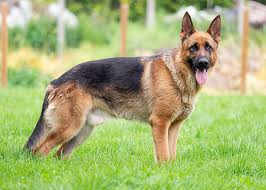

1/1 [==============================] - 1s 585ms/step
The image represents as dog


In [ ]:
input_image_path=input("Path of the image to be predict:")
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255
image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
if(input_pred_label==0):
  print("The image represents a Cat")
else:
  print("The image represents as dog")